In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1 и 4 - нормальное распределение
# 3 и 6 - показательное распределение

d1 = pd.read_csv("1.csv", sep = ',', header=None).to_numpy()
d3 = pd.read_csv("3.csv", sep = ',', header=None).to_numpy()
d4 = pd.read_csv("4.csv", sep = ',', header=None).to_numpy()
d6 = pd.read_csv("6.csv", sep = ',', header=None).to_numpy()

In [ ]:
#Перед применением тестов необходимо сформировать гистограммы
#данных и рассчитать число интервалов, границы интервалов, абсолютные
#и относительные частоты. Построить статистический интервальный ряд
import math

def create_stat_series(x):
    x = np.reshape(x, -1)
    x.sort()
    # Рассчитаем число интервалов по правилу Стёрджесса
    m = round(1 + math.log(len(x), 2))
    # Вычислим значения m+1 границ групп
    h = (x[-1] - x[0]) / m
    bins = []
    bins.append(round(x[0] - 0.01, 2))
    for i in range(m + 1):
        bins.append(round(bins[i] + h, 2))
    # Построить вариационный ряд для выборки интервальных данных
    i = 0
    ni = []
    wi = []
    k = 0
    for num in x:
        if num >= bins[i] and num < bins[i + 1]:
            k += 1
        else:
            ni.append(k)
            wi.append(round(k / len(x), 2))
            k = 1
            i += 1
    if k > 0:
        ni.append(k)
        wi.append(round(k / len(x), 2))

    row = pd.DataFrame({
        '0': bins[:-1],
        '1': bins[1:],
        'ni': ni,
        'wi': wi
        })

    return row, h

       0      1  ni    wi
0 -18.26 -14.71   2  0.06
1 -14.71 -11.16   4  0.12
2 -11.16  -7.61   5  0.16
3  -7.61  -4.06   7  0.22
4  -4.06  -0.51   8  0.25
5  -0.51   3.04   5  0.16
6   3.04   6.59   1  0.03


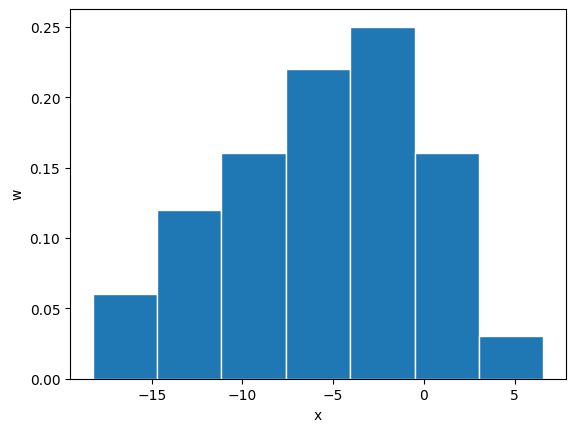

      0     1  ni    wi
0  0.30  1.45  14  0.44
1  1.45  2.60   5  0.16
2  2.60  3.75   4  0.12
3  3.75  4.90   4  0.12
4  4.90  6.05   1  0.03
5  6.05  7.20   3  0.09
6  7.20  8.35   1  0.03


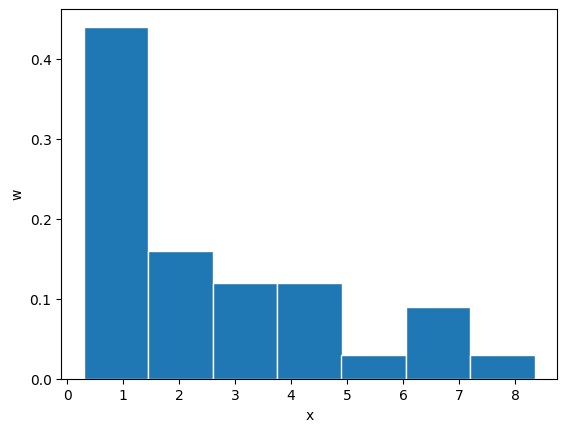

       0      1  ni    wi
0   0.57   2.86   6  0.05
1   2.86   5.15  18  0.14
2   5.15   7.44  20  0.16
3   7.44   9.73  24  0.19
4   9.73  12.02  27  0.21
5  12.02  14.31  17  0.13
6  14.31  16.60  11  0.09
7  16.60  18.89   4  0.03
8  18.89  21.18   1  0.01


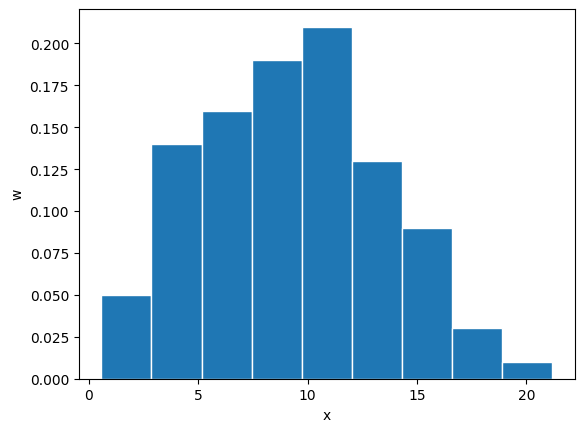

      0     1  ni    wi
0  0.01  1.06  57  0.45
1  1.06  2.11  26  0.20
2  2.11  3.16  27  0.21
3  3.16  4.21   7  0.05
4  4.21  5.26   7  0.05
5  5.26  6.31   1  0.01
6  6.31  7.36   1  0.01
7  7.36  8.41   1  0.01
8  8.41  9.46   1  0.01


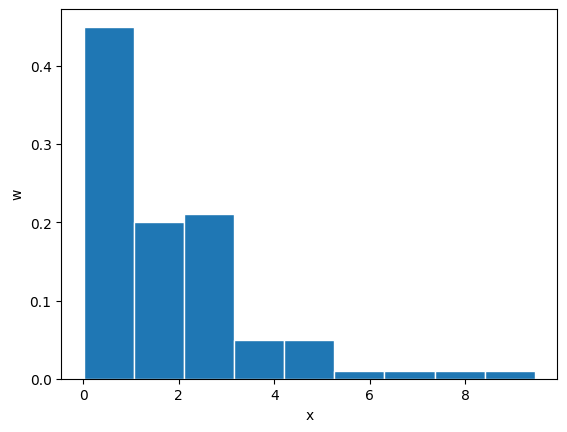

In [ ]:
# Построить гистограмму распределения относительных частот для рассчитанных интервалов выборки
data = [d1, d3, d4, d6]
for x in data:
    row, h = create_stat_series(x)
    print(row)
    #x_labels = []
    #for i, j in zip(row['0'], row['1']):
    #    x_labels.append(f"{i} {j}")
    #plt.figure(figsize=(10,5))
    plt.bar((row['0'] + row['1']) / 2, row['wi'], edgecolor = 'white', width = h)
    #plt.xticks([(row['0'] + row['1']) / 2 for i in range(len(row['wi']))], x_labels)
    plt.xlabel('x')
    plt.ylabel('w')
    plt.show()

In [ ]:
import scipy.stats

def norm_rasp(x):

    x_mean = sum(x) / x.size
    s = np.sqrt(1/(x.size - 1) * sum((x - x_mean)**2))
    row, h = create_stat_series(x)

    alpha = 0.05
    m = round(1 + np.log2(x.size))
    k = m - 2

    row['Pi'] = scipy.stats.norm.cdf((row['1'] - x_mean)/s) - scipy.stats.norm.cdf((row['0'] - x_mean)/s)
    row['nP'] = x.size * row['Pi']
    chi2 = sum((row['ni'] - row['nP'])**2/row['nP'])
    chi2_ppf = scipy.stats.chi2.ppf(1-alpha, k)
    return row, chi2, chi2_ppf

In [ ]:
for x in data:
    row, chi2, chi2_ppf = norm_rasp(x)
    print(row)
    print('chi2 = ', chi2)
    print('chi2_ppf = ', chi2_ppf)

       0      1  ni    wi        Pi        nP
0 -18.26 -14.71   2  0.06  0.045514  1.456454
1 -14.71 -11.16   4  0.12  0.113453  3.630500
2 -11.16  -7.61   5  0.16  0.197265  6.312492
3  -7.61  -4.06   7  0.22  0.239303  7.657700
4  -4.06  -0.51   8  0.25  0.202556  6.481781
5  -0.51   3.04   5  0.16  0.119621  3.827880
6   3.04   6.59   1  0.03  0.049277  1.576871
chi2 =  1.4953970601511837
chi2_ppf =  9.487729036781154
      0     1  ni    wi        Pi        nP
0  0.30  1.45  14  0.44  0.156655  5.012948
1  1.45  2.60   5  0.16  0.212884  6.812275
2  2.60  3.75   4  0.12  0.212764  6.808441
3  3.75  4.90   4  0.12  0.156390  5.004488
4  4.90  6.05   1  0.03  0.084536  2.705164
5  6.05  7.20   3  0.09  0.033599  1.075183
6  7.20  8.35   1  0.03  0.009817  0.314145
chi2 =  23.97196798366897
chi2_ppf =  9.487729036781154
       0      1  ni    wi        Pi         nP
0   0.57   2.86   6  0.05  0.039585   5.066847
1   2.86   5.15  18  0.14  0.096004  12.288460
2   5.15   7.44  20  0.16 

In [ ]:
def pokaz_rasp(x):
    x_mean = sum(x) / x.size
    alpha = 0.05
    row, h = create_stat_series(x)
    m = round(1 + np.log2(x.size))
    k = m - 1
    row['Pi'] = np.exp(-row['0']/x_mean) - np.exp(-row['1']/x_mean)
    row['nP'] = x.size * row['Pi']
    chi2 = sum((row['ni'] - row['nP'])**2/row['nP'])
    chi2_ppf = scipy.stats.chi2.ppf(1-alpha, k)
    return row, chi2, chi2_ppf

In [ ]:
for x in data:
    row, chi2, chi2_ppf = pokaz_rasp(x)
    print(row)
    print('chi2 = ', chi2)
    print('chi2_ppf = ', chi2_ppf)

       0      1  ni    wi        Pi         nP
0 -18.26 -14.71   2  0.06 -0.035153  -1.124887
1 -14.71 -11.16   4  0.12 -0.065498  -2.095937
2 -11.16  -7.61   5  0.16 -0.122039  -3.905237
3  -7.61  -4.06   7  0.22 -0.227388  -7.276400
4  -4.06  -0.51   8  0.25 -0.423678 -13.557692
5  -0.51   3.04   5  0.16 -0.789414 -25.261256
6   3.04   6.59   1  0.03 -1.470869 -47.067823
chi2 =  -194.34619128764217
chi2_ppf =  11.070497693516351
      0     1  ni    wi        Pi         nP
0  0.30  1.45  14  0.44  0.318670  10.197445
1  1.45  2.60   5  0.16  0.204689   6.550037
2  2.60  3.75   4  0.12  0.131476   4.207229
3  3.75  4.90   4  0.12  0.084450   2.702393
4  4.90  6.05   1  0.03  0.054244   1.735805
5  6.05  7.20   3  0.09  0.034842   1.114945
6  7.20  8.35   1  0.03  0.022380   0.716153
chi2 =  6.029536166250534
chi2_ppf =  11.070497693516351
       0      1  ni    wi        Pi         nP
0   0.57   2.86   6  0.05  0.204954  26.234087
1   2.86   5.15  18  0.14  0.160298  20.518151
2   5.1

#Анаморфозы

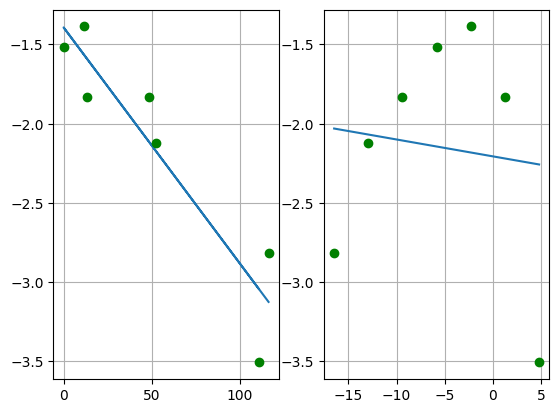

r2 =  0.8558676804409506     r2 =  0.011516074532571308


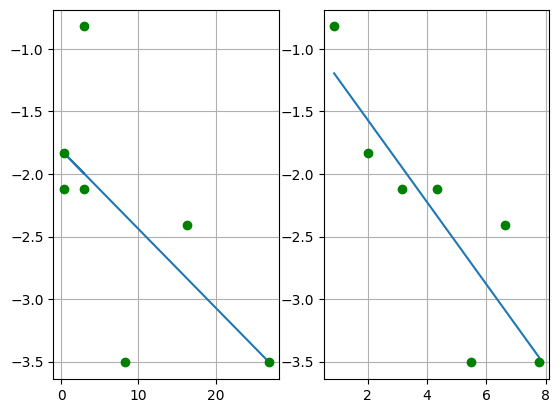

r2 =  0.4353111229441813     r2 =  0.7440109191659479


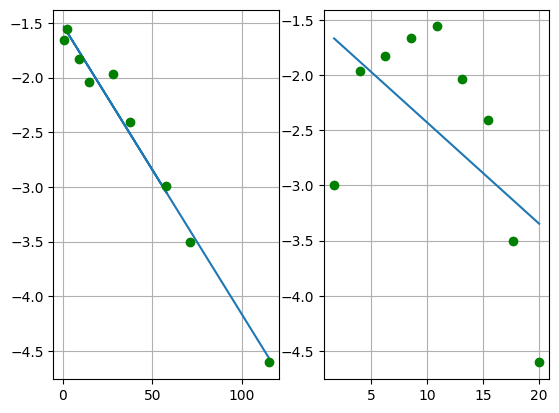

r2 =  0.9809050170819418     r2 =  0.32107335259799763


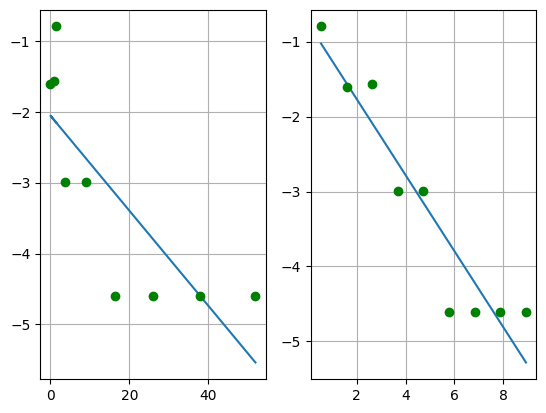

r2 =  0.6560825392671483     r2 =  0.8958548689762302


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for x in data:
  row, h = create_stat_series(x)
  row = row.loc[row['ni'] > 0]
  x = ((row['0'] + row['1'])/2 - sum(x)/x.size)**2
  x = np.array(x).reshape(-1, 1)
  y = np.log(row['wi'])

  fig, axs = plt.subplots(nrows = 1, ncols = 2)
  np.random.seed(1)
  model_lr = LinearRegression()
  model_lr.fit(x, y)
  pred_lr = model_lr.predict(x)
  axs[0].plot(x, pred_lr)
  r2score_norm = r2_score(y, pred_lr)
  axs[0].plot(x, y, 'go')
  axs[0].grid()


#################################

  x = (row['0'] + row['1'])/2
  x = np.array(x).reshape(-1, 1)
  y = np.log(row['wi'])

  model_lr = LinearRegression()
  model_lr.fit(x, y)
  pred_lr = model_lr.predict(x)
  axs[1].plot(x, pred_lr)
  r2score_pokaz = r2_score(y, pred_lr)
  axs[1].plot(x, y, 'go')
  axs[1].grid()

  plt.show()


  print('r2 = ', r2score_norm, '    r2 = ', r2score_pokaz)